In [1]:
import shapely
import pystac_client

In [2]:
import sys

sys.path.append("../..")

In [3]:
from cdseutils.utils import BBox

In [4]:
endpoint_url = "https://catalogue.dataspace.copernicus.eu/stac"

In [5]:
# collection = "COP-DEM"
collection = "CCM"

In [6]:
polygon_wkt = (
    "POLYGON ((111.623686 -30.422697, 112.870434 -26.377362, 113.759005"
    " -25.655883, 114.765229 -25.708236, 115.744513 -26.528056, 116.666913"
    " -26.189345, 117.624098 -26.513583, 118.168346 -27.956584, 116.881996"
    " -32.007367, 115.588516 -32.562306, 114.147425 -31.54362, 113.096861"
    " -31.948575, 112.15162 -31.591408, 111.623686 -30.422697))"
)

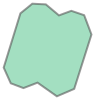

In [7]:
polygon = shapely.from_wkt(polygon_wkt)
polygon

In [8]:
bbox = BBox(*polygon.bounds)
bbox

BBox(left=111.623686, bottom=-32.562306, right=118.168346, top=-25.655883)

In [9]:
client = pystac_client.Client.open(endpoint_url)
assert client.conforms_to("ITEM_SEARCH")
# assert client.conforms_to("FILTER")
client.add_conforms_to("FILTER")  # silence warnings
# assert client.conforms_to("SORT")

In [10]:
client.get_conforms_to()

['https://api.stacspec.org/v1.0.0/core',
 'https://api.stacspec.org/v1.0.0/collections',
 'https://api.stacspec.org/v1.0.0/ogcapi-features',
 'https://api.stacspec.org/v1.0.0/item-search',
 'https://www.opengis.net/spec/ogcapi-features-1/1.0/conf/core',
 'https://www.opengis.net/spec/ogcapi-features-1/1.0/conf/geojson',
 'http://www.opengis.net/spec/cql2/1.0/conf/cql2-json',
 'https://api.stacspec.org/v1.0.*/item-search#filter']

In [11]:
collections = set(client.get_all_collections())
collections

{<CollectionClient id=CCM>,
 <CollectionClient id=CLMS>,
 <CollectionClient id=COP-DEM>,
 <CollectionClient id=ENVISAT>,
 <CollectionClient id=GLOBAL-MOSAICS>,
 <CollectionClient id=LANDSAT-5>,
 <CollectionClient id=LANDSAT-7>,
 <CollectionClient id=LANDSAT-8-ESA>,
 <CollectionClient id=LANDSAT-8>,
 <CollectionClient id=LANDSAT-9>,
 <CollectionClient id=S2GLC>,
 <CollectionClient id=SENTINEL-1-RTC>,
 <CollectionClient id=SENTINEL-1>,
 <CollectionClient id=SENTINEL-2>,
 <CollectionClient id=SENTINEL-3>,
 <CollectionClient id=SENTINEL-5P>,
 <CollectionClient id=SENTINEL-6>,
 <CollectionClient id=SMOS>,
 <CollectionClient id=SUOMI-NPP>,
 <CollectionClient id=TERRA>,
 <CollectionClient id=TERRAAQUA>}

In [12]:
assert collection in {item.id for item in collections}

In [13]:
filter = {  # noqa: A001
    "op": "=",
    "args": [
        {"property": "datasetFull"},
        "COP-DEM_GLO-90-DGED",
    ],
}

In [14]:
# sortby = [
#     {"direction": "asc", "field": "properties.gridId"},
#     {"direction": "desc", "field": "properties.dataset"},
# ]

In [15]:
dged_search = client.search(
    collections=[collection],
    filter=filter,
    bbox=bbox,
    # sortby=sortby,
    # max_items=10,
)

In [16]:
def keyfunc(item):
    return item.properties["gridId"], item.properties["dataset"]


items = sorted(dged_search.items(), key=keyfunc, reverse=True)
items

[<Item id=DEM1_SAR_DGE_90_20110109T212341_20121115T213653_ADS_000000_3683_9adcb42c.DEM>,
 <Item id=DEM1_SAR_DGE_90_20110109T212341_20121115T213653_ADS_000000_3683_9adcb42c.DEM>,
 <Item id=DEM1_SAR_DGE_90_20110109T212341_20121115T213653_ADS_000000_3683_513411cf.DEM>,
 <Item id=DEM1_SAR_DGE_90_20110131T212744_20121115T213653_ADS_000000_3651_09e124c1.DEM>,
 <Item id=DEM1_SAR_DGE_90_20110131T212744_20121115T213653_ADS_000000_3651_cae55e81.DEM>,
 <Item id=DEM1_SAR_DGE_90_20110131T212744_20121115T213653_ADS_000000_3651_cae55e81.DEM>,
 <Item id=DEM1_SAR_DGE_90_20110131T212744_20121115T213653_ADS_000000_3651_513411cf.DEM>,
 <Item id=DEM1_SAR_DGE_90_20110131T212744_20121115T213653_ADS_000000_3651_60ec960a.DEM>,
 <Item id=DEM1_SAR_DGE_90_20110131T212744_20121115T213653_ADS_000000_3651_d850f16f.DEM>,
 <Item id=DEM1_SAR_DGE_90_20110131T212744_20121115T213653_ADS_000000_3651_e2f8c435.DEM>,
 <Item id=DEM1_SAR_DGE_90_20110227T213349_20121120T214521_ADS_000000_3612_f65048bf.DEM>,
 <Item id=DEM1_SAR_DG

In [17]:
len(items)

257

In [18]:
[keyfunc(item) for item in items]

[('S33_E118', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S33_E118', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S33_E118', 'COP-DEM_GLO-90-DGED/2022_1'),
 ('S33_E117', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S33_E117', 'COP-DEM_GLO-90-DGED/2023_1'),
 ('S33_E117', 'COP-DEM_GLO-90-DGED/2023_1'),
 ('S33_E117', 'COP-DEM_GLO-90-DGED/2022_1'),
 ('S33_E117', 'COP-DEM_GLO-90-DGED/2021_1'),
 ('S33_E117', 'COP-DEM_GLO-90-DGED/2020_1'),
 ('S33_E117', 'COP-DEM_GLO-90-DGED/2019_1'),
 ('S33_E116', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S33_E116', 'COP-DEM_GLO-90-DGED/2023_1'),
 ('S33_E116', 'COP-DEM_GLO-90-DGED/2020_1'),
 ('S33_E116', 'COP-DEM_GLO-90-DGED/2019_1'),
 ('S33_E115', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S33_E115', 'COP-DEM_GLO-90-DGED/2023_1'),
 ('S33_E115', 'COP-DEM_GLO-90-DGED/2023_1'),
 ('S33_E115', 'COP-DEM_GLO-90-DGED/2022_1'),
 ('S33_E115', 'COP-DEM_GLO-90-DGED/2020_1'),
 ('S33_E115', 'COP-DEM_GLO-90-DGED/2019_1'),
 ('S32_E118', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S32_E118', 'COP-DEM_GLO-90-DGED/2022_1'),
 ('S32_E11

In [19]:
def remove_duplicates(items, keyfunc=None):
    # sort
    if keyfunc is None:

        def keyfunc(item):
            return item.properties["gridId"], item.properties["dataset"]

    items = sorted(items, key=keyfunc, reverse=True)

    # remove duplicates
    tile_map = {}
    for item in items:
        key = item.properties["gridId"]
        if key in tile_map:
            continue
        tile_map[key] = item

    return list(reversed(tile_map.values()))


unique_items = remove_duplicates(items)
len(unique_items)

43

In [20]:
[keyfunc(item) for item in unique_items]

[('S26_E112', 'COP-DEM_GLO-90-DGED/2023_1'),
 ('S26_E113', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S26_E114', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S26_E115', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S26_E116', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S26_E117', 'COP-DEM_GLO-90-DGED/2023_1'),
 ('S26_E118', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S27_E113', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S27_E114', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S27_E115', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S27_E116', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S27_E117', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S27_E118', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S28_E113', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S28_E114', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S28_E115', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S28_E116', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S28_E117', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S28_E118', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S29_E113', 'COP-DEM_GLO-90-DGED/2024_1'),
 ('S29_E114', 'COP-DEM_GLO-90-DGED/2023_1'),
 ('S29_E115', 'COP-DEM_GLO-90-DGED/2022_1'),
 ('S29_E11

In [21]:
item = items[0]

In [22]:
item

<Item id=DEM1_SAR_DGE_90_20110109T212341_20121115T213653_ADS_000000_3683_9adcb42c.DEM>

In [23]:
asset = item.assets["PRODUCT"]
asset

<Asset href=https://catalogue.dataspace.copernicus.eu/odata/v1/Products(5fefce39-ca63-4cd4-abc2-71482605f926)/$value>

In [24]:
asset.href

'https://catalogue.dataspace.copernicus.eu/odata/v1/Products(5fefce39-ca63-4cd4-abc2-71482605f926)/$value'

In [25]:
asset.extra_fields["alternate"]["s3"]

{'href': '/eodata/CCM/COP-DEM_GLO-90-DGED/SAR_DGE_90_A407/2011/01/09/DEM1_SAR_DGE_90_20110109T212341_20121115T213653_ADS_000000_3683_9adcb42c',
 'storage:platform': 'CLOUDFERRO',
 'storage:region': 'waw',
 'storage:requester_pays': False,
 'storage:tier': 'Online'}